In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
covid_df = pd.read_csv('../data/COVID-19 Time Series Data (1).csv')
covid_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462


In [3]:
covid_df = covid_df.replace(np.nan, '', regex=True)
covid_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,,0,0.0,0
1,2020-01-23,Afghanistan,,0,0.0,0
2,2020-01-24,Afghanistan,,0,0.0,0
3,2020-01-25,Afghanistan,,0,0.0,0
4,2020-01-26,Afghanistan,,0,0.0,0
...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,,247094,0.0,5460
231740,2022-04-13,Zimbabwe,,247160,0.0,5460
231741,2022-04-14,Zimbabwe,,247208,0.0,5462
231742,2022-04-15,Zimbabwe,,247237,0.0,5462


In [4]:
covid_df['Year'] = covid_df['Date'].str[:4]
covid_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Year
0,2020-01-22,Afghanistan,,0,0.0,0,2020
1,2020-01-23,Afghanistan,,0,0.0,0,2020
2,2020-01-24,Afghanistan,,0,0.0,0,2020
3,2020-01-25,Afghanistan,,0,0.0,0,2020
4,2020-01-26,Afghanistan,,0,0.0,0,2020
...,...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,,247094,0.0,5460,2022
231740,2022-04-13,Zimbabwe,,247160,0.0,5460,2022
231741,2022-04-14,Zimbabwe,,247208,0.0,5462,2022
231742,2022-04-15,Zimbabwe,,247237,0.0,5462,2022


In [5]:
#covid_df.to_csv('covid_data.csv')
#covid_df.to_csv('C:/Users/natha/Documents/NSS/Projects/capstone_3/data/covid_data.csv')

In [6]:
year_confirmed = covid_df.groupby(['Year', 'Country/Region'], as_index=False,).agg({'Confirmed':'sum'})
year_confirmed

,Year,Country/Region,Confirmed
0,2020,Afghanistan,8501751
1,2020,Albania,3727544
2,2020,Algeria,10583375
3,2020,Andorra,682822
4,2020,Angola,1343410
...,...,...,...
589,2022,West Bank and Gaza,62611685
590,2022,Winter Olympics 2022,39517
591,2022,Yemen,1201485
592,2022,Zambia,32518940


In [7]:
year = year_confirmed[year_confirmed['Year'].isin(['2020', '2021', '2022'])]
america = year[year['Country/Region'].isin(['US'])]
germany = year[year['Country/Region'].isin(['Germany'])]
united_kingdom = year[year['Country/Region'].isin(['United Kingdom'])]
japan = year[year['Country/Region'].isin(['Japan'])]
korea = year[year['Country/Region'].isin(['Korea, South'])]
canada = year[year['Country/Region'].isin(['Canada'])]

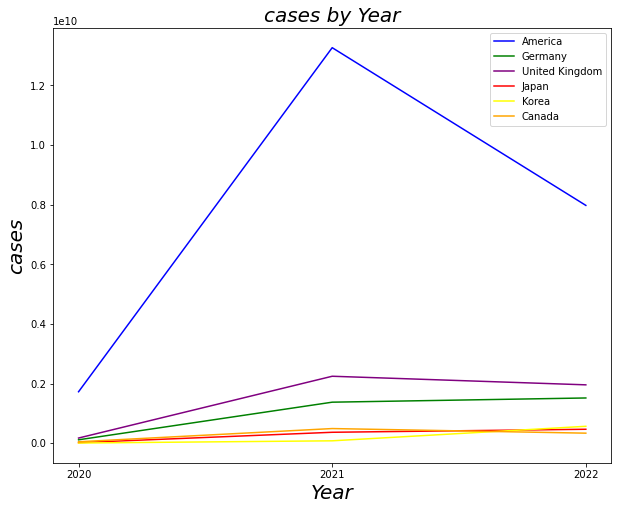

In [8]:
plt.subplots(figsize=(10,8))
plt.plot(america.Year, america.Confirmed, color="Blue")
plt.plot(germany.Year, germany.Confirmed, color="Green")
plt.plot(united_kingdom.Year, united_kingdom.Confirmed, color="Purple")
plt.plot(japan.Year, japan.Confirmed, color="Red")
plt.plot(korea.Year, korea.Confirmed, color="Yellow")
plt.plot(canada.Year, canada.Confirmed, color="Orange")
plt.title('cases by Year', fontsize=20, fontstyle='oblique')
plt.xlabel('Year', fontsize=20, fontstyle='oblique')
plt.ylabel('cases', fontsize=20, fontstyle='oblique')
plt.legend(["America", "Germany", "United Kingdom", "Japan", "Korea", "Canada"])
plt.show()

In [9]:
covid_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Year
0,2020-01-22,Afghanistan,,0,0.0,0,2020
1,2020-01-23,Afghanistan,,0,0.0,0,2020
2,2020-01-24,Afghanistan,,0,0.0,0,2020
3,2020-01-25,Afghanistan,,0,0.0,0,2020
4,2020-01-26,Afghanistan,,0,0.0,0,2020
...,...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,,247094,0.0,5460,2022
231740,2022-04-13,Zimbabwe,,247160,0.0,5460,2022
231741,2022-04-14,Zimbabwe,,247208,0.0,5462,2022
231742,2022-04-15,Zimbabwe,,247237,0.0,5462,2022


In [10]:
covid_df['MonthYr'] = covid_df['Date'].str[:7]
covid_df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Year,MonthYr
0,2020-01-22,Afghanistan,,0,0.0,0,2020,2020-01
1,2020-01-23,Afghanistan,,0,0.0,0,2020,2020-01
2,2020-01-24,Afghanistan,,0,0.0,0,2020,2020-01
3,2020-01-25,Afghanistan,,0,0.0,0,2020,2020-01
4,2020-01-26,Afghanistan,,0,0.0,0,2020,2020-01
...,...,...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,,247094,0.0,5460,2022,2022-04
231740,2022-04-13,Zimbabwe,,247160,0.0,5460,2022,2022-04
231741,2022-04-14,Zimbabwe,,247208,0.0,5462,2022,2022-04
231742,2022-04-15,Zimbabwe,,247237,0.0,5462,2022,2022-04


In [12]:
covid_21 = covid_df[['Country/Region', 'Confirmed', 'Deaths', 'MonthYr']]
covid_21

,Country/Region,Confirmed,Deaths,MonthYr
0,Afghanistan,0,0,2020-01
1,Afghanistan,0,0,2020-01
2,Afghanistan,0,0,2020-01
3,Afghanistan,0,0,2020-01
4,Afghanistan,0,0,2020-01
...,...,...,...,...
231739,Zimbabwe,247094,5460,2022-04
231740,Zimbabwe,247160,5460,2022-04
231741,Zimbabwe,247208,5462,2022-04
231742,Zimbabwe,247237,5462,2022-04


In [20]:
covid_21 = covid_21.groupby(['MonthYr', 'Country/Region'], as_index=False,).agg({'Confirmed':'sum', 'Deaths':'sum'})
covid_21

,MonthYr,Country/Region,Confirmed,Deaths
0,2020-01,Afghanistan,0,0
1,2020-01,Albania,0,0
2,2020-01,Algeria,0,0
3,2020-01,Andorra,0,0
4,2020-01,Angola,0,0
...,...,...,...,...
5539,2022-04,West Bank and Gaza,10500631,90485
5540,2022-04,Winter Olympics 2022,8560,0
5541,2022-04,Yemen,188992,34330
5542,2022-04,Zambia,5081445,63485


In [21]:
month = covid_21[covid_21['MonthYr'].isin(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09','2021-10', '2021-11', '2021-12',])]

In [24]:
month

,MonthYr,Country/Region,Confirmed,Deaths
2376,2021-01,Afghanistan,1671259,71891
2377,2021-01,Albania,2088163,39480
2378,2021-01,Algeria,3212268,87734
2379,2021-01,Andorra,279226,2805
2380,2021-01,Angola,580289,13481
...,...,...,...,...
4747,2021-12,West Bank and Gaza,14421874,150521
4748,2021-12,Winter Olympics 2022,0,0
4749,2021-12,Yemen,312407,61083
4750,2021-12,Zambia,6817388,114177


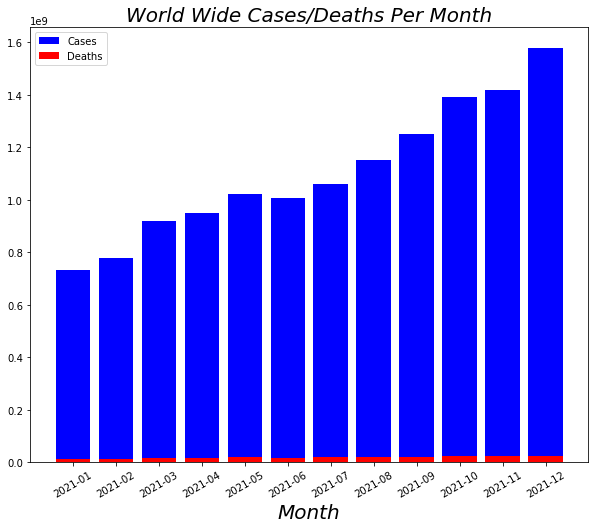

In [34]:
plt.subplots(figsize=(10,8))
plt.bar(month.MonthYr, month.Confirmed, color="Blue")
plt.bar(month.MonthYr, month.Deaths, color="Red")
plt.title('World Wide Cases/Deaths Per Month', fontsize=20, fontstyle='oblique')
plt.xlabel('Month', fontsize=20, fontstyle='oblique')
plt.legend(["Cases", "Deaths"])
plt.xticks(rotation = 30)
plt.show()